In [1]:
train_dir = 'chest_xray/train'
test_dir = 'chest_xray/test'
val_dir = 'chest_xray/val'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Setting up data generators

In [3]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                  rotation_range=20,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True)
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

### creating data generators for each step

In [4]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(224,224),
batch_size=32, 
class_mode='binary',)

val_generator = val_test_datagen.flow_from_directory(
val_dir,
target_size=(224,224),
batch_size=32, 
class_mode='binary')

test_generator = val_test_datagen.flow_from_directory(
test_dir,
target_size=(224,224),
batch_size=32, 
class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
print("Training set class indices:", train_generator.class_indices)
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", val_generator.samples)
print("Number of test samples:", test_generator.samples)

Training set class indices: {'NORMAL': 0, 'PNEUMONIA': 1}
Number of training samples: 5216
Number of validation samples: 16
Number of test samples: 624


In [6]:
import os
!pip install scipy

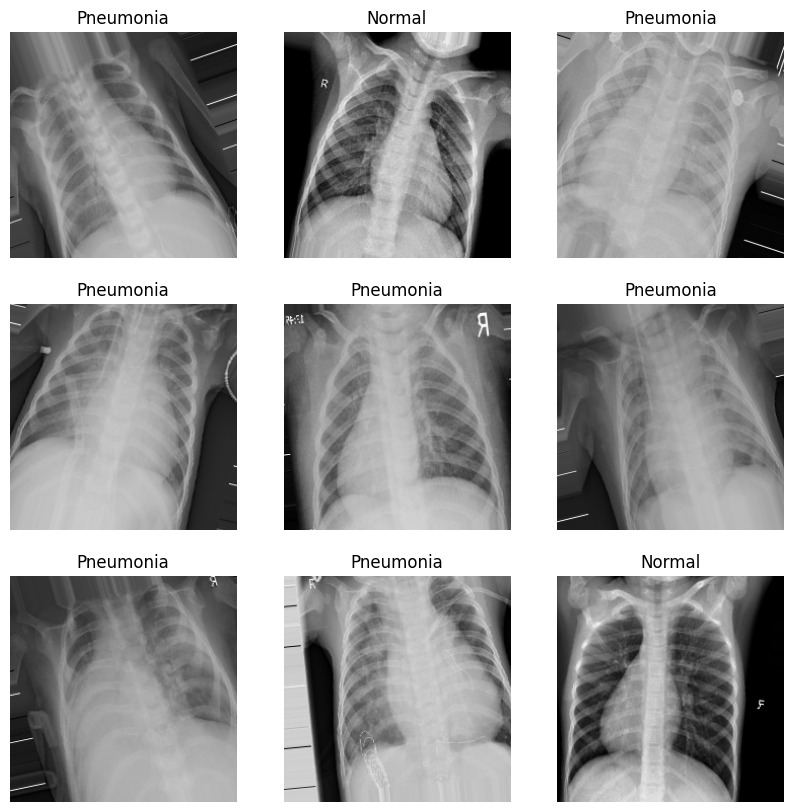

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
images, labels = next(train_generator)

# Plot the first 9 images in the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title("Pneumonia" if labels[i] == 1 else "Normal")
    plt.axis('off')
plt.show()

In [8]:
# Check the shape of the images and labels
print("Image shape:", images[0].shape)
print("Label for first image:", labels[0])


Image shape: (224, 224, 3)
Label for first image: 1.0


### Model

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model


In [10]:
base_model = EfficientNetB0(weights='imagenet',
                            include_top=False, 
                            input_shape=(224,224,3))

In [11]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_generator, validation_data=val_generator, epochs=5)

C:\Users\Manan\Desktop\coding2\Ml_course\ML_projects\pneumonia chest x ray\ml\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 1035s 6s/step - accuracy: 0.9167 - loss: 0.2108 - val_accuracy: 0.5000 - val_loss: 4.6574
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 918s 6s/step - accuracy: 0.9620 - loss: 0.0972 - val_accuracy: 0.5000 - val_loss: 4.5698
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 937s 6s/step - accuracy: 0.9726 - loss: 0.0750 - val_accuracy: 0.5000 - val_loss: 10.2710
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 917s 6s/step - accuracy: 0.9774 - loss: 0.0619 - val_accuracy: 0.5000 - val_loss: 8.4552
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 935s 6s/step - accuracy: 0.9776 - loss: 0.0556 - val_accuracy: 0.5000 - val_loss: 1196.6365


In [14]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4045 - loss: 1398.0785
Test Accuracy: 0.375


In [17]:
model.save("pneumonia_detection_model.keras")